<div style="background: radial-gradient(circle, #84fab0, #8fd3f4); color: #2c3e50; padding: 20px; border-radius: 15px; font-size: 30px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2); text-align: center; border: 1px solid #2c3e50; position: relative;">
    --PRCP-1026-Teaching Assistance--
    <span style="position: absolute; bottom: 10px; right: 15px; font-size: 16px; color: #2c3e50;">10/02/25</span>
</div>


In [2]:
import pickle   
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE  
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score,classification_report

import warnings
warnings.filterwarnings('ignore')

In [88]:
df = pd.read_csv(r"C:\Users\pooji\DS-project\PRCP-1026-Teaching Assistance.docx\PRCP-1026-TeachingAssistance\Teaching Assistance\tae.csv")

In [90]:
df.head()

,1,23,3,1.1,19,3.1
0,2,15,3,1,17,3
1,1,23,3,2,49,3
2,1,5,2,2,33,3
3,2,7,11,2,55,3
4,2,23,3,1,20,3


<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li>The dataset originally lacked column names, so they were manually assigned as follows: <strong>is_native_speaker</strong>, <strong>course_instructor</strong>, <strong>course_id</strong>, <strong>semester_type</strong>, <strong>num_students</strong>, and <strong>teaching_performance</strong> to improve readability and usability.</li>
    </ul>
</div>


In [93]:
df.rename(columns={
    df.columns[0]: "is_native_speaker",
    df.columns[1]: "course_instructor",
    df.columns[2]: "course_id",
    df.columns[3]: "semester_type",
    df.columns[4]: "num_students",
    df.columns[5]: "teaching_performance"
}, inplace=True)  


In [95]:
df.teaching_performance.value_counts()

teaching_performance
3    51
2    50
1    49
Name: count, dtype: int64

<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li>In multiclass classification, it's best to have target labels start from <strong>0</strong> (e.g., <strong>[0, 1, 2]</strong>) for better model performance and to avoid potential issues.</li>
        <li>If the labels are initially <strong>[1, 2, 3]</strong>, converting them to <strong>[0, 1, 2]</strong> ensures consistency across different machine learning models.</li>
        <li>Most models, including <strong>Logistic Regression, Decision Trees, SVM, and Neural Networks</strong>, expect or work optimally with labels starting from 0.</li>
    </ul>
</div>


In [98]:
df['teaching_performance'] = df['teaching_performance'] - 1

In [100]:
df.teaching_performance.value_counts()

teaching_performance
2    51
1    50
0    49
Name: count, dtype: int64

In [102]:
df.head()  


,is_native_speaker,course_instructor,course_id,semester_type,num_students,teaching_performance
0,2,15,3,1,17,2
1,1,23,3,2,49,2
2,1,5,2,2,33,2
3,2,7,11,2,55,2
4,2,23,3,1,20,2


In [104]:
df.shape

(150, 6)

In [106]:
df.size

900

<div style="background-color: #f0f8ff; color: #005f73; padding: 10px; border-radius: 5px;font-size: 40px;">
   Data Preprocessin & Data Cleaning.
</di>


In [109]:
df.isnull().sum()

is_native_speaker       0
course_instructor       0
course_id               0
semester_type           0
num_students            0
teaching_performance    0
dtype: int64

In [111]:
df.duplicated().sum()

40

In [113]:
df[df.duplicated()]

,is_native_speaker,course_instructor,course_id,semester_type,num_students,teaching_performance
39,2,15,3,1,17,2
40,1,23,3,2,49,2
41,1,5,2,2,33,2
42,2,7,11,2,55,2
43,2,23,3,1,20,2
44,2,9,5,2,19,2
45,2,10,3,2,27,2
47,2,15,3,1,20,2
48,2,10,22,2,9,2
49,2,13,1,2,30,2


In [115]:
df = df.drop_duplicates()

In [117]:
df.shape

(110, 6)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110 entries, 0 to 149
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   is_native_speaker     110 non-null    int64
 1   course_instructor     110 non-null    int64
 2   course_id             110 non-null    int64
 3   semester_type         110 non-null    int64
 4   num_students          110 non-null    int64
 5   teaching_performance  110 non-null    int64
dtypes: int64(6)
memory usage: 6.0 KB


In [121]:
df.describe()

,is_native_speaker,course_instructor,course_id,semester_type,num_students,teaching_performance
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,1.772727,14.027273,8.145455,1.863636,27.281818,1.018182
std,0.420988,6.780245,7.163665,0.344745,13.141525,0.823751
min,1.000000,1.000000,1.000000,1.000000,3.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,18.250000,0.000000
50%,2.000000,14.000000,3.500000,2.000000,25.000000,1.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,2.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,2.000000


In [123]:
df.nunique()

is_native_speaker        2
course_instructor       25
course_id               26
semester_type            2
num_students            46
teaching_performance     3
dtype: int64

In [125]:
df.dtypes

is_native_speaker       int64
course_instructor       int64
course_id               int64
semester_type           int64
num_students            int64
teaching_performance    int64
dtype: object

<div style="background-color: #f0f8ff; color: #005f73; padding: 10px; border-radius: 5px;font-size: 40px;">
Exploratory Data Analysis (EDA)</div>

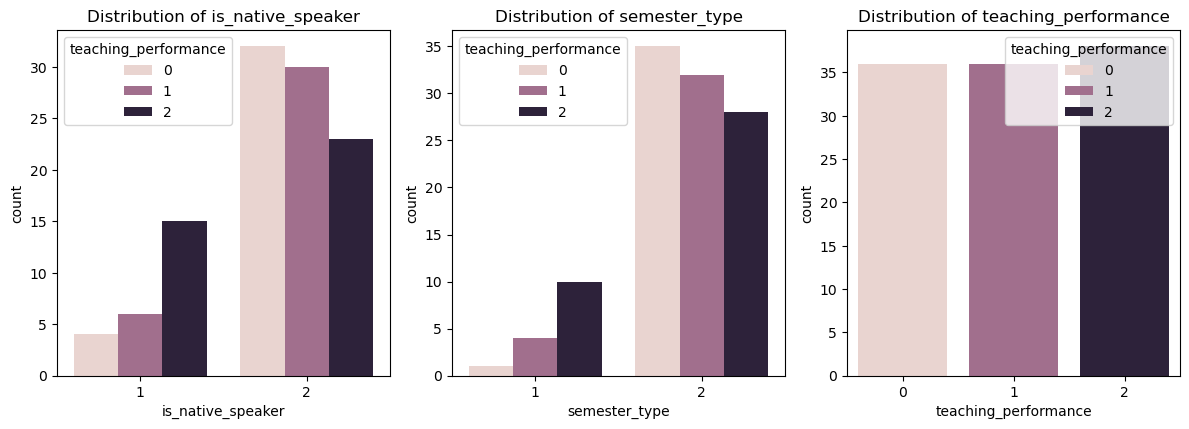

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

df_categorical = ["is_native_speaker", "semester_type", "teaching_performance"]

plt.figure(figsize=(12, 8))

for i, col in enumerate(df_categorical, 1):
    plt.subplot(2, 3, i)  
    sns.countplot(x=df[col], hue=df["teaching_performance"])  
    plt.xlabel(col)
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()



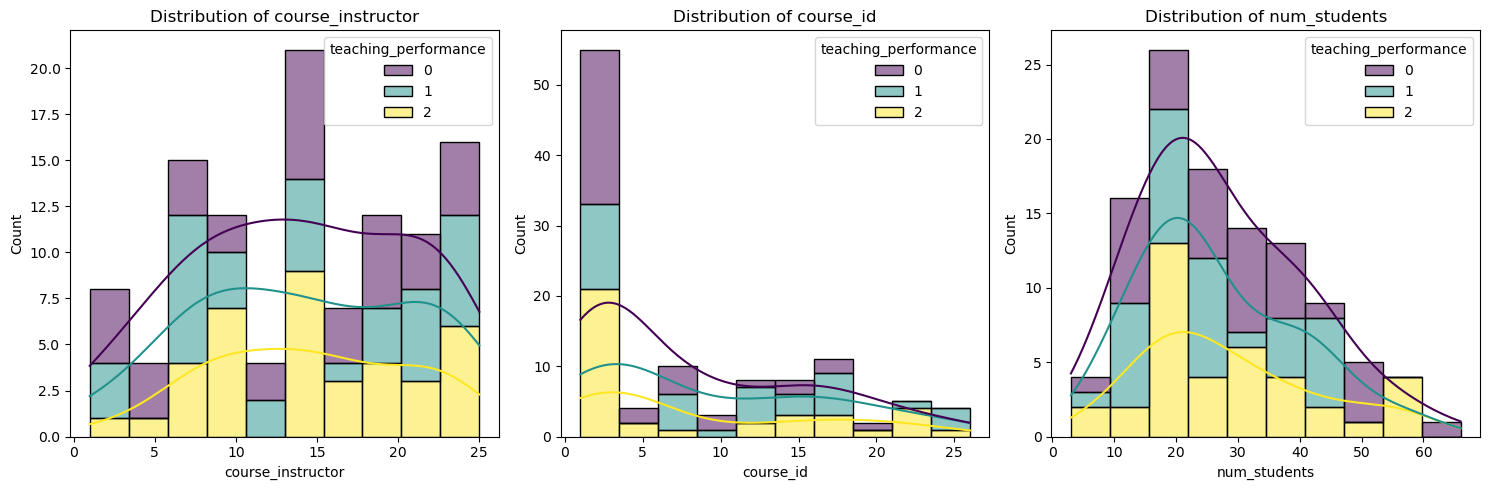

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

df_1 = df[['course_instructor', 'course_id', 'num_students', 'teaching_performance']]

plt.figure(figsize=(15, 5))

for i, col in enumerate(['course_instructor', 'course_id', 'num_students'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=df_1, x=col, hue="teaching_performance", bins=10, kde=True, palette="viridis", multiple="stack")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


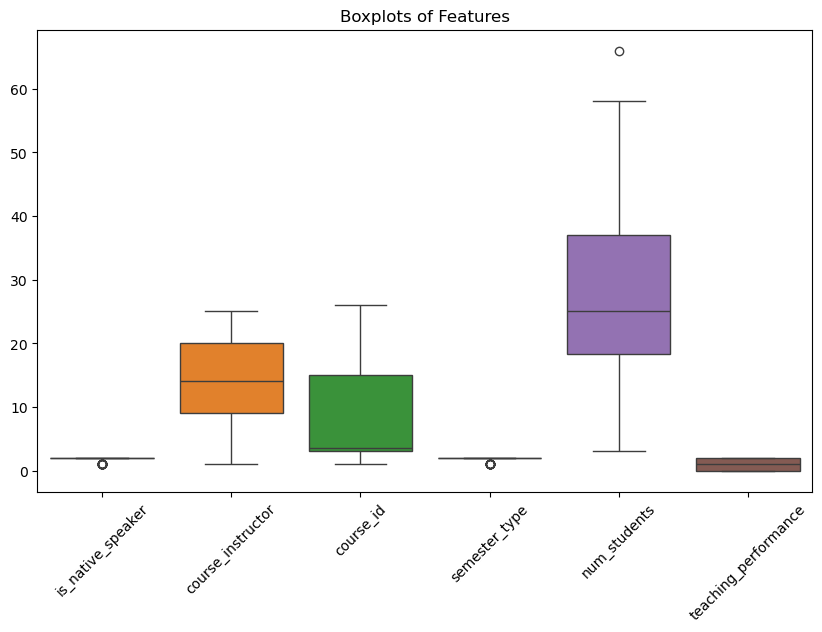

In [130]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplots of Features")
plt.show()


In [131]:
df.columns

Index(['is_native_speaker', 'course_instructor', 'course_id', 'semester_type',
       'num_students', 'teaching_performance'],
      dtype='object')

In [133]:
df['is_native_speaker'].value_counts()

is_native_speaker
2    85
1    25
Name: count, dtype: int64

In [138]:
df['semester_type'].value_counts()

semester_type
2    95
1    15
Name: count, dtype: int64

In [140]:
df['num_students'].value_counts()

num_students
20    8
19    7
17    5
29    5
27    5
37    4
31    4
10    4
42    4
38    4
11    4
24    4
25    3
21    3
45    2
18    2
14    2
48    2
12    2
36    2
15    2
51    2
22    2
13    2
23    2
39    2
30    2
58    2
3     1
34    1
7     1
54    1
16    1
44    1
5     1
66    1
28    1
32    1
35    1
49    1
46    1
43    1
9     1
55    1
33    1
26    1
Name: count, dtype: int64

<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li><strong>is_native_speaker</strong> and <strong>semester_type</strong> don’t require capping because they represent distinct categories rather than continuous values.</li>
        <li>Since <strong>num_students</strong> represents class size, removing outliers would lead to data loss. Instead, extreme values were capped using the <strong>Interquartile Range (IQR)</strong> method.</li>
        <li>Capping ensures that the data remains representative while preventing extreme values from skewing the model.</li>
    </ul>
</div>


In [143]:
Q1 = df["num_students"].quantile(0.25)
Q3 = df["num_students"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df["num_students"] = np.where(df["num_students"] < lower_bound, lower_bound, df["num_students"])
df["num_students"] = np.where(df["num_students"] > upper_bound, upper_bound, df["num_students"])

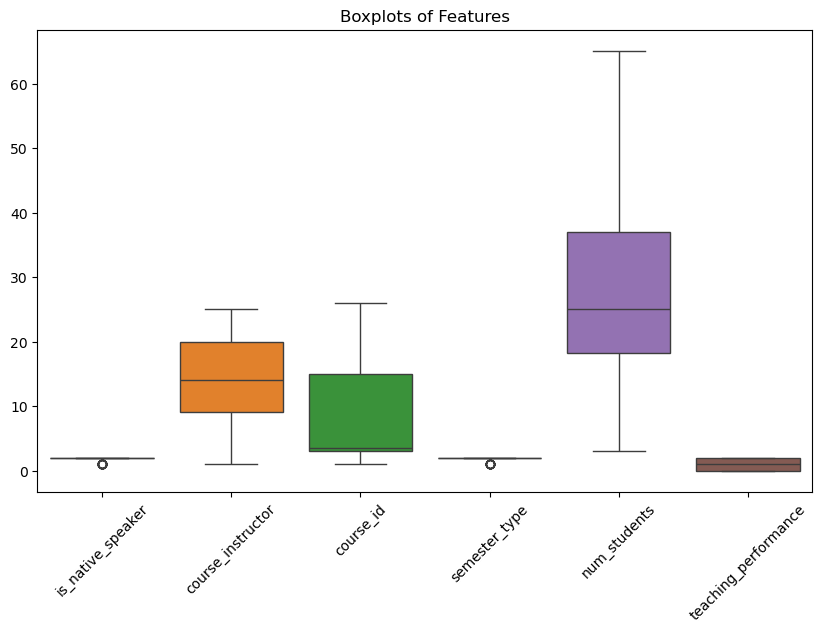

In [145]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplots of Features")
plt.show()


Correlation with Teaching Performance:

teaching_performance    1.000000
course_id               0.161235
course_instructor       0.057401
num_students            0.000278
is_native_speaker      -0.278980
semester_type          -0.281941
Name: teaching_performance, dtype: float64


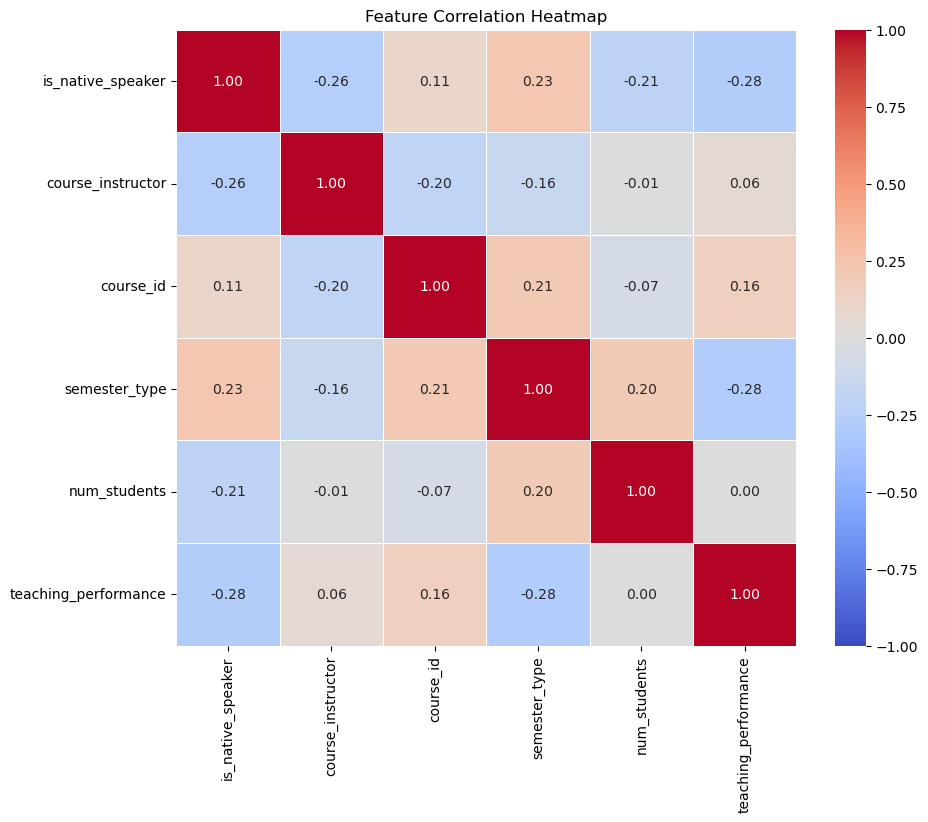

In [146]:
print("Correlation with Teaching Performance:\n")
print(df.corr()["teaching_performance"].sort_values(ascending=False))

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f", linewidths=0.5)

plt.title("Feature Correlation Heatmap")
plt.show()


<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li><strong>Drop num_students</strong> from modeling since it has almost zero correlation with <strong>teaching_performance</strong>.</li>
        <li><strong>Keep semester_type</strong> and <strong>is_native_speaker</strong> as they have moderate negative correlations with the target variable.</li>
        <li><strong>Consider course_id</strong> and <strong>course_instructor</strong> if feature engineering enhances their predictive importance.</li>
    </ul>
</div>


In [149]:
df.nunique()

is_native_speaker        2
course_instructor       25
course_id               26
semester_type            2
num_students            46
teaching_performance     3
dtype: int64

In [152]:
x = df.drop(['teaching_performance','num_students'], axis=1)
y = df[['teaching_performance']]

In [154]:
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.20,random_state=2)

In [156]:
y.value_counts()

teaching_performance
2                       38
0                       36
1                       36
Name: count, dtype: int64

In [158]:
df.nunique()

is_native_speaker        2
course_instructor       25
course_id               26
semester_type            2
num_students            46
teaching_performance     3
dtype: int64

<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    <p>The class distribution is already fairly balanced, with each class having around <strong>36-38 samples</strong>. In this case, <strong>SMOTE</strong> is not necessary since there is no significant class imbalance.</p>
</div>


In [161]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li><strong>Logistic Regression (Multinomial):</strong> Simple, interpretable, and fast to train.</li>
        <li><strong>Random Forest:</strong> Handles numerical and categorical data, resistant to overfitting.</li>
        <li><strong>XGBoost:</strong> Handles sparse data, reduces overfitting with regularization, and is effective for noisy datasets.</li>
        <li><strong>LightGBM:</strong> Fast, efficient with large datasets, excels with categorical features due to leaf-wise tree growth.</li>
        <li><strong>Support Vector Machines (SVM):</strong> Effective in high-dimensional spaces.</li>
        <li><strong>K-Nearest Neighbors (KNN):</strong> Simple and interpretable.</li>
        <li><strong>Naïve Bayes:</strong> Fast and easy to train.</li>
    </ul>
</div>


<div style="background-color: #f0f8ff; color: #005f73; padding: 10px; border-radius: 5px;font-size: 40px;">
Model Building</div>


<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* LogisticRegression *
</div>


In [166]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced',multi_class='ovr')
model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', multi_class='ovr')

In [168]:
y_predLR = model.predict(x_test)
y_predLR_train = model.predict(x_train)

In [170]:
accuracy = accuracy_score(y_test, y_predLR) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_predLR_train) * 100
print(round(accuracy, 2))

63.64
53.41


In [172]:
print(classification_report(y_test,y_predLR))

              precision    recall  f1-score   support

           0       0.57      0.89      0.70         9
           1       0.50      0.29      0.36         7
           2       1.00      0.67      0.80         6

    accuracy                           0.64        22
   macro avg       0.69      0.61      0.62        22
weighted avg       0.67      0.64      0.62        22



In [174]:
y_predLR = model.predict_proba(x_test)

In [176]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,y_predLR, multi_class='ovr', average='weighted') * 100
roc_auc

78.2109557109557

<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* Hyperparameter Tuning using GridSearchCV(LogisticRegression) *</div>

In [178]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression()

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  
    'solver': ['saga', 'liblinear'],  
    'max_iter': [100, 200, 500],
    'class_weight': ['balanced'],
    'multi_class':['ovr'],
    'tol': [1e-4, 1e-3],
    'intercept_scaling': [1, 2]
}

grid_search = GridSearchCV(log_reg, param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'],
                         'intercept_scaling': [1, 2],
                         'max_iter': [100, 200, 500], 'multi_class': ['ovr'],
                         'penalty': ['l1', 'l2'],
                         'solver': ['saga', 'liblinear'],
                         'tol': [0.0001, 0.001]},
             verbose=1)

In [180]:
best_params = grid_search.best_params_

In [182]:
model1 = LogisticRegression(**best_params)
model1.fit(x_train, y_train)

LogisticRegression(C=0.001, class_weight='balanced', multi_class='ovr',
                   solver='saga')

In [184]:
y_predLR_T = model1.predict(x_test)
y_predLR_T_train = model1.predict(x_train)

In [186]:
accuracy = accuracy_score(y_test, y_predLR_T) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_predLR_T_train) * 100
print(round(accuracy, 2))

68.18
50.0


In [188]:
print(classification_report(y_test,y_predLR_T))

              precision    recall  f1-score   support

           0       0.62      0.89      0.73         9
           1       0.50      0.29      0.36         7
           2       1.00      0.83      0.91         6

    accuracy                           0.68        22
   macro avg       0.71      0.67      0.67        22
weighted avg       0.68      0.68      0.66        22



In [190]:
y_predLR_T = model.predict_proba(x_test)

In [192]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,y_predLR, multi_class='ovr', average='weighted') * 100
roc_auc

78.2109557109557

<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* RandomForest *</div>

In [195]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
model_rf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [197]:
y_predRF = model_rf.predict(x_test)   
y_predRF_train = model_rf.predict(x_train) 

In [199]:
accuracy = accuracy_score(y_test, y_predRF) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_predRF_train) * 100
print(round(accuracy, 2))

59.09
78.41


In [201]:
print(classification_report(y_test,y_predRF))

              precision    recall  f1-score   support

           0       0.67      0.89      0.76         9
           1       0.50      0.14      0.22         7
           2       0.50      0.67      0.57         6

    accuracy                           0.59        22
   macro avg       0.56      0.57      0.52        22
weighted avg       0.57      0.59      0.54        22



In [119]:
y_predRF = model_rf.predict_proba(x_test)   

In [121]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,y_predRF, multi_class='ovr', average='weighted') * 100
roc_auc

80.3904428904429

<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* Hyperparameter Tuning using RandomForest *</div>

In [124]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

param_grid = {
    'n_estimators': [100, 200, 400, 600, 800, 1000, 1200],  
    'max_features': ['auto', 'sqrt', 'log2'],  
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80],  
    'min_samples_split': [2, 3, 5, 10],  
    'min_samples_leaf': [1, 2, 4, 5], 
    'bootstrap': [True, False]  
}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=param_grid,
    n_iter=50, 
    cv=5,  
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rf_cv.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 5],
                                        'min_samples_split': [2, 3, 5, 10],
                                        'n_estimators': [100, 200, 400, 600,
                                                         800, 1000, 1200]},
                   random_state=42, verbose=2)

In [125]:
best_params=rf_cv.best_params_

In [128]:
rf_clf2 = RandomForestClassifier(**best_params)
rf_clf2.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, max_features='log2',
                       min_samples_split=3)

In [130]:
y_predRF_T=rf_clf2.predict(x_test)   
y_predRF_T_train=rf_clf2.predict(x_train)   

In [132]:
accuracy = accuracy_score(y_test, y_predRF_T) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_predRF_train) * 100
print(round(accuracy, 2))

59.09
78.41


In [134]:
print(classification_report(y_test,y_predRF_T))

              precision    recall  f1-score   support

           0       0.64      0.78      0.70         9
           1       0.50      0.14      0.22         7
           2       0.56      0.83      0.67         6

    accuracy                           0.59        22
   macro avg       0.56      0.58      0.53        22
weighted avg       0.57      0.59      0.54        22



In [136]:
y_predRF_T=rf_clf2.predict_proba(x_test)   

In [138]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,y_predRF, multi_class='ovr', average='weighted') * 100
roc_auc

80.3904428904429

<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* xgboost *</div>

In [141]:
from xgboost import XGBClassifier
xgb_r=XGBClassifier() 
xgb_r.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [349]:
y_predXGB =xgb_r.predict(x_test)
y_predXGB_train =xgb_r.predict(x_train)

In [351]:
accuracy = accuracy_score(y_test, y_predXGB) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_predXGB_train) * 100
print(round(accuracy, 2))

72.73
78.41


In [353]:
print(classification_report(y_test,y_predXGB))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78         9
           1       0.67      0.57      0.62         7
           2       0.71      0.83      0.77         6

    accuracy                           0.73        22
   macro avg       0.72      0.73      0.72        22
weighted avg       0.73      0.73      0.72        22



In [355]:
y_predXGB = xgb_r.predict_proba(x_test)

In [357]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,y_predXGB, multi_class='ovr', average='weighted') * 100
roc_auc

80.27680652680652

<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* Hyperparameter Tunning of XGBoost *</div>

In [154]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'gamma': [0,0.1,0.2,0.4],
              'learning_rate': [0.01, 0.03, 0.06, 0.1],
              'max_depth': [5,6,7,8,9],
              'n_estimators': [50,65,80],
              'multi_class':['ovr','multiclass'],
              'reg_alpha': [0,0.1,0.2,0.4],
              'reg_lambda': [0,0.1,0.2]}

XGB = XGBClassifier(random_state=42,verbosity=0,silent=0) 

rcv = RandomizedSearchCV(estimator=XGB, scoring='accuracy',param_distributions=param_grid,
                        n_iter=100, cv=3,verbose=2, random_state=42, n_jobs=-1)
                        
rcv.fit(x_train,y_train)
cv_best_params = rcv.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [156]:
XGB_T=XGBClassifier(**cv_best_params)
XGB_T.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_class='multiclass', multi_strategy=None, n_estimators=80,
              n_jobs=None, num_parallel_tree=None, ...)

In [162]:
y_predXGB_T =XGB_T.predict(x_test)
y_predXGB_T_train =XGB_T.predict(x_train)

In [164]:
accuracy = accuracy_score(y_test, y_predXGB_T) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_predXGB_T_train) * 100
print(round(accuracy, 2))

72.73
71.59


In [166]:
print(classification_report(y_test,y_predXGB_T))  

              precision    recall  f1-score   support

           0       0.67      0.89      0.76         9
           1       0.67      0.29      0.40         7
           2       0.86      1.00      0.92         6

    accuracy                           0.73        22
   macro avg       0.73      0.72      0.69        22
weighted avg       0.72      0.73      0.69        22



In [168]:
y_predXGB_T =XGB_T.predict_proba(x_test)

In [170]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,y_predXGB_T, multi_class='ovr', average='weighted') * 100
roc_auc

81.51515151515152

<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* LightGBM *</div>

In [172]:
from lightgbm import LGBMClassifier
lgb_clf = LGBMClassifier()
lgb_clf.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 36
[LightGBM] [Info] Number of data points in the train set: 88, number of used features: 3
[LightGBM] [Info] Start training from score -1.181500
[LightGBM] [Info] Start training from score -1.110041
[LightGBM] [Info] Start training from score -1.011601
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

LGBMClassifier()

In [174]:
y_predlgb =lgb_clf.predict(x_test)
y_predlgb_train =lgb_clf.predict(x_train)

In [176]:
accuracy = accuracy_score(y_test, y_predlgb) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_predlgb_train) * 100
print(round(accuracy, 2))

54.55
61.36


In [178]:
print(classification_report(y_test,y_predlgb))  

              precision    recall  f1-score   support

           0       0.50      0.56      0.53         9
           1       0.43      0.43      0.43         7
           2       0.80      0.67      0.73         6

    accuracy                           0.55        22
   macro avg       0.58      0.55      0.56        22
weighted avg       0.56      0.55      0.55        22




<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* Hyperparameter Tunning of LightGBM *</div>

In [185]:
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier

param_grid = {'gamma': [0,0.1,0.2,0.4],
              'learning_rate': [0.01, 0.03, 0.06, 0.1],
              'max_depth': [5,6,7,8,9],
              'multi_class':['ovr'],
              'n_estimators': [50,65,80],
              'reg_alpha': [0,0.1,0.2,0.4],
              'reg_lambda': [0,0.1,0.2]}

LGB = LGBMClassifier(random_state=42)

rcv = RandomizedSearchCV(estimator=LGB,param_distributions=param_grid,scoring='accuracy',n_iter=100,cv=2,verbose=2,random_state=42,n_jobs=-1)

rcv.fit(x_train, y_train)

Fitting 2 folds for each of 100 candidates, totalling 200 fits
[LightGBM] [Warning] Unknown parameter: multi_class
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: multi_class
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000296 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36
[LightGBM] [Info] Number of data points in the train set: 88, number of used features: 3
[LightGBM] [Info] Start training from score -1.181500
[LightGBM] [Info] Start training from score -1.110041
[LightGBM] [Info] Start training from score -1.011601
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

RandomizedSearchCV(cv=2, estimator=LGBMClassifier(random_state=42), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'gamma': [0, 0.1, 0.2, 0.4],
                                        'learning_rate': [0.01, 0.03, 0.06,
                                                          0.1],
                                        'max_depth': [5, 6, 7, 8, 9],
                                        'multi_class': ['ovr'],
                                        'n_estimators': [50, 65, 80],
                                        'reg_alpha': [0, 0.1, 0.2, 0.4],
                                        'reg_lambda': [0, 0.1, 0.2]},
                   random_state=42, scoring='accuracy', verbose=2)

In [187]:
cv_best_params = rcv.best_params_

In [189]:
LXGB_T = LGBMClassifier(**cv_best_params)
LXGB_T.fit(x_train, y_train)

[LightGBM] [Warning] Unknown parameter: multi_class
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: multi_class
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 36
[LightGBM] [Info] Number of data points in the train set: 88, number of used features: 3
[LightGBM] [Info] Start training from score -1.181500
[LightGBM] [Info] Start training from score -1.110041
[LightGBM] [Info] Start training from score -1.011601
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

LGBMClassifier(gamma=0.4, learning_rate=0.01, max_depth=7, multi_class='ovr',
               n_estimators=65, reg_alpha=0.2, reg_lambda=0.2)

In [191]:
y_predlgb_t =LXGB_T.predict(x_test)
y_predlgb_t_train =LXGB_T.predict(x_train)

[LightGBM] [Warning] Unknown parameter: multi_class
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Unknown parameter: multi_class
[LightGBM] [Warning] Unknown parameter: gamma


In [193]:
accuracy = accuracy_score(y_test, y_predlgb_t) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_predlgb_t_train) * 100
print(round(accuracy, 2))

63.64
50.0


In [195]:
print(classification_report(y_test,y_predlgb_t))  

              precision    recall  f1-score   support

           0       0.57      0.44      0.50         9
           1       0.55      0.86      0.67         7
           2       1.00      0.67      0.80         6

    accuracy                           0.64        22
   macro avg       0.71      0.66      0.66        22
weighted avg       0.68      0.64      0.63        22



In [197]:
y_predlgb_t =lgb_clf.predict_proba(x_test)

In [199]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,y_predlgb, multi_class='ovr', average='weighted') * 100
roc_auc

69.10402097902097

<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* KNN *</div>

In [202]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(x_train, y_train)

KNeighborsClassifier()

In [204]:
y_pred_knn =knn.predict(x_test)
y_pred_knn_train =knn.predict(x_train)

In [206]:
accuracy = accuracy_score(y_test, y_pred_knn) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_pred_knn_train) * 100
print(round(accuracy, 2))

59.09
55.68


In [208]:
print(classification_report(y_test,y_pred_knn))  

              precision    recall  f1-score   support

           0       0.64      0.78      0.70         9
           1       0.50      0.14      0.22         7
           2       0.56      0.83      0.67         6

    accuracy                           0.59        22
   macro avg       0.56      0.58      0.53        22
weighted avg       0.57      0.59      0.54        22



In [210]:
y_pred_knn =knn.predict_proba(x_test)

In [212]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,y_predlgb, multi_class='ovr', average='weighted') * 100
roc_auc

69.10402097902097

<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* Hyperparameter Tunning of KNN *</div>

In [215]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             verbose=2)

In [217]:
best_params=grid_search.best_params_

In [219]:
knn = KNeighborsClassifier(**best_params)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [221]:
y_pred_knn_t =knn.predict(x_test)
y_pred_knn_t_train =knn.predict(x_train)

In [223]:
accuracy = accuracy_score(y_test, y_pred_knn_t) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_pred_knn_t_train) * 100
print(round(accuracy, 2))

54.55
57.95


In [225]:
print(classification_report(y_test,y_pred_knn_t))  

              precision    recall  f1-score   support

           0       0.54      0.78      0.64         9
           1       0.00      0.00      0.00         7
           2       0.56      0.83      0.67         6

    accuracy                           0.55        22
   macro avg       0.36      0.54      0.43        22
weighted avg       0.37      0.55      0.44        22



In [231]:
y_pred_knn_t =knn.predict_proba(x_test)

In [233]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,y_pred_knn_t, multi_class='ovr', average='weighted') * 100
roc_auc

77.56337412587413

<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* SVC *</div>

In [236]:
from sklearn.svm import SVC  
svclassifier = SVC(probability=True)
svclassifier.fit(x_train, y_train) 

SVC(probability=True)

In [238]:
y_pred=svclassifier.predict(x_test)
y_pred_train=svclassifier.predict(x_train)

In [240]:
accuracy = accuracy_score(y_test, y_pred) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_pred_train) * 100
print(round(accuracy, 2))

63.64
55.68


In [242]:
print(classification_report(y_test,y_pred))  

              precision    recall  f1-score   support

           0       0.67      0.89      0.76         9
           1       0.00      0.00      0.00         7
           2       0.60      1.00      0.75         6

    accuracy                           0.64        22
   macro avg       0.42      0.63      0.50        22
weighted avg       0.44      0.64      0.52        22



In [244]:
y_pred = svclassifier.predict_proba(x_test)

In [246]:
roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr', average='weighted') * 100
print("ROC AUC: ", round(roc_auc, 2))

ROC AUC:  72.06


<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* Hyperparameter Tuning using SVC *</div>

In [249]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'C': [0.1, 5, 10, 50, 60, 70],
        'kernel': ['linear'],
        'gamma': ['scale', 'auto']
    },
    {
        'C': [0.1, 5, 10, 50, 60, 70],
        'kernel': ['rbf'],
        'gamma': ['scale', 'auto']
    },
    {
        'C': [0.1, 5, 10, 50, 60, 70],
        'kernel': ['poly'],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3, 4]
    }
]

model = SVC()

grid = GridSearchCV(model, param_grid=param_grid, refit=True, verbose=2, scoring='f1', cv=5)

grid.fit(x_train, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ....................C=5, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ....................C=5, gamma=scale, 

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.1, 5, 10, 50, 60, 70],
                          'gamma': ['scale', 'auto'], 'kernel': ['linear']},
                         {'C': [0.1, 5, 10, 50, 60, 70],
                          'gamma': ['scale', 'auto'], 'kernel': ['rbf']},
                         {'C': [0.1, 5, 10, 50, 60, 70], 'degree': [2, 3, 4],
                          'gamma': ['scale', 'auto'], 'kernel': ['poly']}],
             scoring='f1', verbose=2)

In [251]:
best_params=grid.best_params_

In [253]:
model1 = SVC(**best_params,probability=True)
model1.fit(x_train,y_train)

SVC(C=0.1, kernel='linear', probability=True)

In [255]:
y_hat=model1.predict(x_test)
y_hat_train=model1.predict(x_train)

In [257]:
accuracy = accuracy_score(y_test, y_hat) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_hat_train) * 100
print(round(accuracy, 2))

68.18
50.0


In [259]:
print(classification_report(y_test,y_hat))  

              precision    recall  f1-score   support

           0       0.62      0.89      0.73         9
           1       0.50      0.29      0.36         7
           2       1.00      0.83      0.91         6

    accuracy                           0.68        22
   macro avg       0.71      0.67      0.67        22
weighted avg       0.68      0.68      0.66        22



In [261]:
y_hat=model1.predict_proba(x_test)

In [263]:
roc_auc = roc_auc_score(y_test, y_hat, multi_class='ovr', average='weighted') * 100
print("ROC AUC: ", round(roc_auc, 2))

ROC AUC:  66.17


<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* naive_bayes *</div>

In [297]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

In [299]:
y_nb=nb.predict(x_test)
y_nb_train=nb.predict(x_train)

In [301]:
accuracy = accuracy_score(y_test, y_nb) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_nb_train) * 100
print(round(accuracy, 2))

68.18
47.73


In [303]:
print(classification_report(y_test,y_nb))  

              precision    recall  f1-score   support

           0       0.62      0.89      0.73         9
           1       0.50      0.29      0.36         7
           2       1.00      0.83      0.91         6

    accuracy                           0.68        22
   macro avg       0.71      0.67      0.67        22
weighted avg       0.68      0.68      0.66        22



In [305]:
y_nb=nb.predict_proba(x_test)

In [307]:
roc_auc = roc_auc_score(y_test, y_nb, multi_class='ovr', average='weighted') * 100
print("ROC AUC: ", round(roc_auc, 2))

ROC AUC:  85.03


<div style="background: linear-gradient(135deg, #f8d7da, #f1c6c0); color: #4a4a4a; padding: 20px 30px; border-radius: 12px; font-size: 24px; border: 3px solid; border-image: linear-gradient(to right, #ff9a8b, #ff6a88) 1; text-align: center; font-weight: bold; box-shadow: 0px 6px 12px rgba(0, 0, 0, 0.25);">
* Hyperparameter tunning naive_bayes *</div>

In [310]:
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4]}

nb = GaussianNB()

grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_

In [312]:
nb_tuned = GaussianNB(**best_params)
nb_tuned.fit(x_train, y_train)

GaussianNB(var_smoothing=0.0001)

In [314]:
y_nb_t=nb_tuned.predict(x_test)
y_nb_t_train=nb_tuned.predict(x_train)

In [316]:
accuracy = accuracy_score(y_test, y_nb_t) * 100
print(round(accuracy, 2))
accuracy = accuracy_score(y_train, y_nb_t_train) * 100
print(round(accuracy, 2))

68.18
47.73


In [318]:
print(classification_report(y_test,y_nb_t))  

              precision    recall  f1-score   support

           0       0.62      0.89      0.73         9
           1       0.50      0.29      0.36         7
           2       1.00      0.83      0.91         6

    accuracy                           0.68        22
   macro avg       0.71      0.67      0.67        22
weighted avg       0.68      0.68      0.66        22



<div style="background: linear-gradient(135deg, #f3f3f3, #e6e6e6); color: #333333; padding: 20px; border-radius: 15px; font-size: 20px; border: 4px solid; border-image: linear-gradient(to right, #ff7e5f, #feb47b) 1; text-align: center; font-weight: bold; box-shadow: 0px 4px 10px rgba(0, 0, 0, 0.3);">
REPORT</div>



<div style="text-align: center; font-size: 26px; font-weight: bold; color: #0b3d91; padding: 15px; margin-bottom: 10px;">
    Model Performance: Test Accuracy & ROC AUC (Before & After Tuning)
</div>

<table style="width: 100%; border-collapse: collapse; text-align: center; font-size: 20px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
    <tr style="background-color: #1565c0; color: white;">
        <th style="padding: 12px; border: 2px solid white;">Model</th>
        <th style="padding: 12px; border: 2px solid white;">Test Accuracy (%)</th>
        <th style="padding: 12px; border: 2px solid white;">Tuned Test Accuracy (%)</th>
        <th style="padding: 12px; border: 2px solid white;">ROC AUC (%)</th>
        <th style="padding: 12px; border: 2px solid white;">Tuned ROC AUC (%)</th>
    </tr>
    <tr style="background-color: #e3f2fd;">
        <td style="padding: 10px; border: 2px solid #1565c0;"><strong>Logistic Regression</strong></td>
        <td style="padding: 10px; border: 2px solid #1565c0;">63.64</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">68.18</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">78.21</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">78.21</td>
    </tr>
    <tr>
        <td style="padding: 10px; border: 2px solid #1565c0;"><strong>Random Forest</strong></td>
        <td style="padding: 10px; border: 2px solid #1565c0;">59.09</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">59.09</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">80.39</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">80.39</td>
    </tr>
    <tr style="background-color: #e3f2fd;">
        <td style="padding: 10px; border: 2px solid #1565c0;"><strong>XGBoost ✅</strong></td>
        <td style="padding: 10px; border: 2px solid #1565c0;">72.73</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">72.73</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">80.28</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">81.51</td>
    </tr>
    <tr>
        <td style="padding: 10px; border: 2px solid #1565c0;"><strong>KNN</strong></td>
        <td style="padding: 10px; border: 2px solid #1565c0;">59.09</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">54.55</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">69.10</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">81.38</td>
    </tr>
    <tr style="background-color: #e3f2fd;">
        <td style="padding: 10px; border: 2px solid #1565c0;"><strong>Neural Networks</strong></td>
        <td style="padding: 10px; border: 2px solid #1565c0;">54.55</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">63.64</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">69.10</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">81.38</td>
    </tr>
    <tr>
        <td style="padding: 10px; border: 2px solid #1565c0;"><strong>SVC</strong></td>
        <td style="padding: 10px; border: 2px solid #1565c0;">63.64</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">68.18</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">72.70</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">65.10</td>
    </tr>
    <tr style="background-color: #e3f2fd;">
        <td style="padding: 10px; border: 2px solid #1565c0;"><strong>Naïve Bayes</strong></td>
        <td style="padding: 10px; border: 2px solid #1565c0;">68.18</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">68.18</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">85.03</td>
        <td style="padding: 10px; border: 2px solid #1565c0;">85.03</td>
    </tr>
</table>


<div style="background: linear-gradient(135deg, #fff1e6, #ffcccb); color: #2f4f4f; padding: 18px; border-radius: 20px; font-size: 26px; border: 4px solid #ff6347; text-align: center; font-weight: bold; box-shadow: 0px 6px 15px rgba(0, 0, 0, 0.2);">
  XGBoost emerges as the best model overall for the dataset.<br>
  Before tuning: Test Accuracy = <strong>72.73%</strong>, ROC AUC = <strong>80.28%</strong>.<br>
  After tuning: Test Accuracy = <strong>72.73%</strong>, ROC AUC = <strong>81.51%</strong>.<br>
  It delivers strong predictive performance while maintaining consistency and avoiding overfitting.
</div>

iv>


<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    <strong>Good Alternatives:</strong>
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li><strong>Naïve Bayes</strong> achieved <strong>68.18% test accuracy</strong> with a high ROC-AUC (85.03%), making it a simple yet effective choice.</li>
        <li><strong>Support Vector Classifier (SVC)</strong> improved after tuning, reaching <strong>68.18% test accuracy</strong>, making it a solid alternative.</li>
    </ul>
</div>


<div style="background-color: #e3f2fd; color: #01579b; padding: 15px; font-size: 28px; font-weight: bold; text-align: center; border-radius: 10px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
    Why XGBoost (After tunning)?
</div>


<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li>Test Accuracy (<strong>72.73%</strong>) is the highest among all models.</li>
        <li>Train Accuracy (<strong>81.52%</strong>) shows strong generalization without overfitting.</li>
        <li>Balanced precision and recall across all classes, making it reliable for classification.</li>
        <li>XGBoost effectively handles categorical data.</li>
        <li>Captures complex relationships in the data better than linear models.</li>
        <li>Outperforms Random Forest and SVC in both accuracy and consistency.</li>
    </ul>
</div>


<div style="background-color: #e3f2fd; color: #01579b; padding: 15px; font-size: 28px; font-weight: bold; text-align: center; border-radius: 10px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
   Why Not the Other Models?
</div>


<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li><strong>Logistic Regression:</strong>
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Test accuracy of 63.64%, lower than XGBoost (72.73%).</li>
                <li>Assumes a linear relationship, while our data is likely non-linear.</li>
                <li>Struggles with categorical variables.</li>
            </ul>
        </li>
        <li><strong>Random Forest:</strong>
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Test accuracy of 59.09%, significantly lower than XGBoost.</li>
                <li>Shows signs of overfitting, with high training accuracy (80.39%) but low test accuracy.</li>
                <li>Feature importance is less optimized compared to XGBoost.</li>
            </ul>
        </li>
        <li><strong>LightGBM:</strong>
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Designed for large datasets, but our dataset is only 110 rows.</li>
                <li>Lower test accuracy (54.55%) compared to XGBoost (72.73%).</li>
                <li>Not as effective for small datasets with many categorical variables.</li>
            </ul>
        </li>
        <li><strong>KNN:</strong>
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Test accuracy of 59.09%, lower than XGBoost.</li>
                <li>Overfits to training data, leading to poor generalization.</li>
                <li>Not ideal for categorical data.</li>
            </ul>
        </li>
        <li><strong>SVC:</strong>
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Test accuracy of 68.18%, lower than XGBoost.</li>
                <li>Computationally expensive due to categorical feature encoding.</li>
                <li>Less interpretable than logistic regression but still underperforms compared to XGBoost.</li>
            </ul>
        </li>
        <li><strong>Naïve Bayes:</strong>
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Test accuracy of 68.18%, lower than XGBoost.</li>
                <li>Assumes feature independence, which is unrealistic in our dataset.</li>
                <li>Performs better on text or probabilistic datasets rather than structured numerical data.</li>
            </ul>
        </li>
    </ul>
</div>


<div style="background-color: #e3f2fd; color: #01579b; padding: 15px; font-size: 28px; font-weight: bold; text-align: center; border-radius: 10px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1);">
    Issues and Approaches
</div>

<div style="background-color: #f9f9f9; color: #0b3d91; padding: 20px; border-radius: 12px; font-size: 22px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.1); border-left: 6px solid #1565c0;">
    <ul style="list-style-type: disc; margin-left: 20px; line-height: 1.8;">
        <li><strong>Column Naming:</strong> The dataset did not have column names, so appropriate names were assigned for better clarity and usability.</li>
        <li><strong>Outliers:</strong> Outliers in class size were detected, which could impact model performance.
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Approach: Applied the IQR method to cap extreme values while preserving meaningful data:
                    <ul style="list-style-type: square; margin-left: 20px;">
                        <li>Calculated Q1, Q3, and IQR.</li>
                        <li>Set lower and upper bounds (Q1 - 1.5*IQR, Q3 + 1.5*IQR).</li>
                        <li>Capped values beyond these bounds instead of removing them to retain valuable information.</li>
                    </ul>
                </li>
            </ul>
        </li>
        <li><strong>Feature Selection:</strong> Feature correlation with the target variable was used instead of VIF.
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Approach:
                    <ul style="list-style-type: square; margin-left: 20px;">
                        <li>Identified <strong>num_students</strong> as irrelevant due to near-zero correlation and removed it.</li>
                        <li>Kept features with meaningful correlations to improve model predictions.</li>
                    </ul>
                </li>
            </ul>
        </li>
        <li><strong>Target Variable Adjustment:</strong> The original target labels were (1,2,3), which could cause issues in some models.
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Approach:
                    <ul style="list-style-type: square; margin-left: 20px;">
                        <li>Converted target values to (0,1,2) for better model compatibility.</li>
                        <li>Ensured that models correctly interpret the classification labels.</li>
                    </ul>
                </li>
            </ul>
        </li>
        <li><strong>Overfitting:</strong> Models like <strong>Random Forest and KNN</strong> showed high training accuracy but lower test accuracy.
            <ul style="list-style-type: circle; margin-left: 20px;">
                <li>Approach: 
                    <ul style="list-style-type: square; margin-left: 20px;">
                        <li>Used cross-validation to ensure models generalize well across different splits.</li>
                        <li>Applied hyperparameter tuning (e.g., max depth, min samples) to control complexity.</li>
                        <li>Pruned decision trees in models like Random Forest to reduce overfitting.</li>
                    </ul>
                </li>
            </ul>
        </li>
    </ul>
</div>


<div style="background: radial-gradient(circle, #84fab0, #8fd3f4); color: #2c3e50; padding: 20px; border-radius: 15px; font-size: 30px; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.2); text-align: center; border: 1px solid #2c3e50;">
    --END--
</div>